In [1]:
from pathlib import Path
import io
from pprint import pprint
from PIL import Image
import torch

In [2]:
def load_all_checkpoints(ticker: str):
    """
    Load every checkpoint matching `{ticker}_*.pth` in the current working directory.
    For each checkpoint:
      1) load checkpoint dict (CPU),
      2) print hparams and train/val metrics,
      3) display train plot if present,
    """
    cwd = Path.cwd()
    ckpt_paths = sorted(cwd.glob(f"{ticker}_*.pth"))

    loaded = {}
    for p in ckpt_paths:
        print("Loading checkpoint:", p)
        ckpt = torch.load(p, map_location="cpu", weights_only=False)

        print("\nHyperparameters:")
        pprint(ckpt.get("hparams", {}))

        if "train_plot_png" in ckpt:
            try:
                img = Image.open(io.BytesIO(ckpt["train_plot_png"]))
                display(img)
            except Exception:
                print("  (train_plot_png present but could not display)")

        print("\nTrain metrics:", ckpt.get("train_metrics"))
        print(" Val metrics:", ckpt.get("val_metrics"))
        print('\n------------------------------------------------------------------------------------------------------------------------------\n')

    return loaded


Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.09041_fin.pth

Hyperparameters:
{'ALPHA_SMOOTH': 0.0,
 'CLIPNORM': 3,
 'CONV_DILATION': 1,
 'CONV_K': 3,
 'DROPOUT_LONG': 0.15,
 'DROPOUT_SHORT': 0.15,
 'EARLY_STOP_PATIENCE': 10,
 'FLATTEN_MODE': 'last',
 'LAMBDA_DELTA': 0.1,
 'LONG_UNITS': 64,
 'LOOK_BACK': 60,
 'MAX_EPOCHS': 100,
 'MICRO_SAMPLE_K': 16,
 'ONECYCLE_DIV_FACTOR': 5,
 'ONECYCLE_FINAL_DIV': 50,
 'ONECYCLE_MAX_LR': 0.003,
 'ONECYCLE_PCT_START': 0.2,
 'ONECYCLE_STRATEGY': 'cos',
 'PRED_HIDDEN': 128,
 'SHORT_UNITS': 128,
 'TCN_KERNEL': 3,
 'TCN_LAYERS': 2,
 'TRAIN_BATCH': 32,
 'TRAIN_PREFETCH_FACTOR': 4,
 'TRAIN_WORKERS': 8,
 'TRANSFORMER_FF_MULT': 4,
 'TRANSFORMER_HEADS': 4,
 'TRANSFORMER_LAYERS': 1,
 'USE_CONV': False,
 'USE_DELTA': False,
 'USE_LONG_LSTM': False,
 'USE_SHORT_LSTM': True,
 'USE_TCN': False,
 'USE_TRANSFORMER': True,
 'VAL_BATCH': 1,
 'WEIGHT_DECAY': 0.00015}


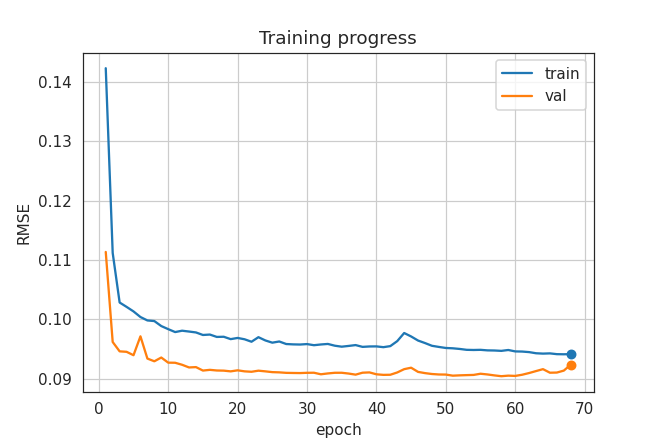


Train metrics: {'rmse': 0.09413685330742938, 'mae': 0.0646822072473968, 'r2': 0.3144171877778642}
 Val metrics: {'rmse': 0.09235607585951647, 'mae': 0.06302068743298761, 'r2': 0.28235406675503605}

------------------------------------------------------------------------------------------------------------------------------



{}

In [3]:
load_all_checkpoints("AAPL")